Let's go.

In [97]:
import pandas as pd

In [98]:
def openData():
    df=pd.read_csv("../data2.csv")
    df.drop_duplicates()
    return df
df=openData()
df=df.drop(['district'],axis=1)
df=df.dropna(subset=['price'])
df.drop('rooms',axis=1,inplace=True)
df['random']=(df['averageDistrictValue'])**2
df.drop('floor',axis=1,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   meter                 6799 non-null   int64  
 1   buildYear             6799 non-null   int64  
 2   price                 6799 non-null   int64  
 3   elevator              6799 non-null   int64  
 4   space                 6799 non-null   int64  
 5   parking               6799 non-null   int64  
 6   averageDistrictValue  6799 non-null   float64
 7   test                  6799 non-null   float64
 8   random                6799 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 478.2 KB


just working a bit with the dataset to understand what's going on. you can pass this.

In [99]:
print(df.describe())

               meter     buildYear         price     elevator        space  \
count    6799.000000   6799.000000  6.799000e+03  6799.000000  6799.000000   
mean      161.506986   1393.994999  1.137078e+10     0.731284     0.760406   
std      3644.407559    151.955820  1.623626e+10     0.443325     0.426867   
min        19.000000   1370.000000  0.000000e+00     0.000000     0.000000   
25%        59.000000   1385.000000  3.300000e+09     0.000000     1.000000   
50%        80.000000   1393.000000  6.000000e+09     1.000000     1.000000   
75%       114.000000   1400.000000  1.300000e+10     1.000000     1.000000   
max    270000.000000  13902.000000  2.400000e+11     1.000000     1.000000   

           parking  averageDistrictValue          test        random  
count  6799.000000          6.799000e+03  6.799000e+03  6.799000e+03  
mean      0.859538          9.920652e+07  2.452659e+10  1.283169e+16  
std       0.347491          5.468268e+07  8.200961e+11  1.512085e+16  
min       0.0

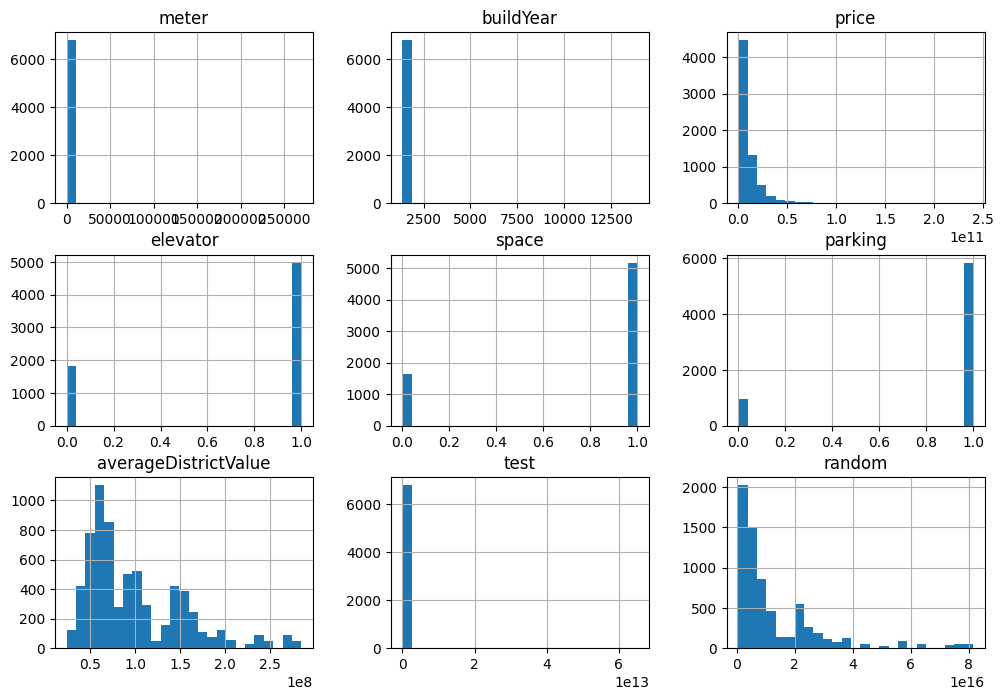

In [100]:
import matplotlib.pyplot as plt
df.hist(bins=25, figsize=(12, 8))
plt.show()

**Deleting the outliers**

In [101]:
import numpy as np
from scipy import stats
outlierHigh = df["price"].quantile(0.98)
outlierLow = df["price"].quantile(0.02)
df.reset_index()
df=df[(df['price'] > 2e9) & (df['price'] < 50e9)]
df=df[(df['meter'] > 35) & (df['meter'] < 2000)]
df=df[(df['buildYear'] > 1355) & (df['buildYear'] < 1404)]


print(outlierLow/1e9,outlierHigh/1e9)
df.describe()

1.3 62.039999999999964


,meter,buildYear,price,elevator,space,parking,averageDistrictValue,test,random
count,6201.000000,6201.000000,6.201000e+03,6201.000000,6201.000000,6201.000000,6.201000e+03,6.201000e+03,6.201000e+03
mean,90.639736,1391.966780,9.671624e+09,0.737300,0.765844,0.860990,9.789183e+07,1.004158e+10,1.210555e+16
std,42.493907,8.506631,8.782641e+09,0.440136,0.423504,0.345985,5.023090e+07,9.424785e+09,1.335175e+16
min,36.000000,1370.000000,2.014000e+09,0.000000,0.000000,0.000000,2.343980e+07,1.570673e+09,5.494244e+14
25%,60.000000,1385.000000,3.500000e+09,0.000000,1.000000,1.000000,6.006631e+07,3.682186e+09,3.607962e+15
50%,80.000000,1393.000000,6.220000e+09,1.000000,1.000000,1.000000,8.130357e+07,6.315417e+09,6.610270e+15
75%,112.000000,1400.000000,1.270000e+10,1.000000,1.000000,1.000000,1.335930e+08,1.298082e+10,1.784709e+16
max,600.000000,1403.000000,4.990000e+10,1.000000,1.000000,1.000000,2.856078e+08,8.128615e+10,8.157180e+16


**making the test set**

In [102]:
from zlib import crc32
import numpy as np
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32
def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


adding an index to data as it's needed.

In [103]:
house_with_id = df.reset_index() # adds an `index` column
train_set, test_set = split_data_with_id_hash(house_with_id, 0.2, "index")

stratified sampling:

count    6.201000e+03
mean     9.671624e+09
std      8.782641e+09
min      2.014000e+09
25%      3.500000e+09
50%      6.220000e+09
75%      1.270000e+10
max      4.990000e+10
Name: price, dtype: float64


Text(0, 0.5, 'Number of districts')

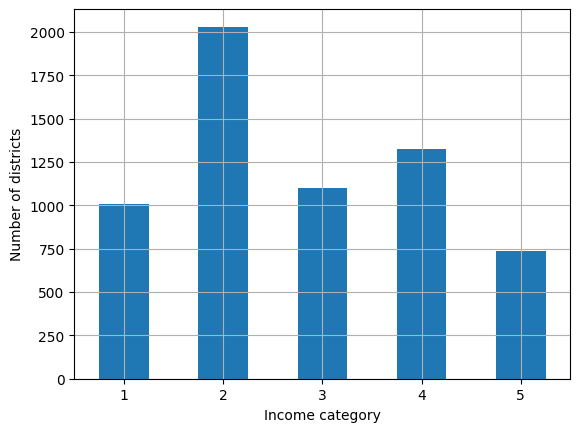

In [104]:
print(df['price'].describe())
df["cat"] = pd.cut(df["price"].astype(float),
bins=[0., 3e9, 6e9, 10e9, 20e9, np.inf],
labels=[1, 2, 3, 4, 5])
df["cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
# plt.show()

In [105]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
stratSplits = []
for trainIndex, testIndex in splitter.split(df, df["cat"]):
    stratTrainSetN = df.iloc[trainIndex]
    stratTestSetN = df.iloc[testIndex]
    stratSplits.append([stratTrainSetN, stratTestSetN])
    
stratTrainSet, stratTestSet = stratSplits[0]

In [106]:
for set_ in ( stratTrainSet ,stratTestSet):
    set_.drop("cat", axis=1 , inplace=True)

/tmp/ipykernel_32064/1832761340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("cat", axis=1 , inplace=True)
/tmp/ipykernel_32064/1832761340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("cat", axis=1 , inplace=True)


_**START of the MODEL pre-process**_

In [107]:
house = stratTrainSet.copy()
corr_matrix = house.corr()
print(corr_matrix['price'].sort_values(ascending=False))

price                   1.000000
test                    0.927811
meter                   0.824504
averageDistrictValue    0.797162
random                  0.779929
space                   0.356959
elevator                0.336828
parking                 0.217567
buildYear               0.164680
Name: price, dtype: float64


_note 1_ : wow it seems that meter is really important!

In [108]:
house = stratTrainSet.drop('price',axis=1)
labels = stratTrainSet[['price']].copy()

**And finally The PIPELINE**

In [109]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
houseNum=house.select_dtypes(np.number)

num_pipeline = Pipeline([
("impute", SimpleImputer(strategy='most_frequent')),
])
houseNumPrepared=num_pipeline.fit_transform(houseNum)
cat_pipeline = make_pipeline(
SimpleImputer(strategy="most_frequent"))

preprocessing = ColumnTransformer([],remainder=num_pipeline)
preprocessing.fit(house)
preprocessing

ColumnTransformer(remainder=Pipeline(steps=[('impute',
                                             SimpleImputer(strategy='most_frequent'))]),
                  transformers=[])

**Train**

**Really, Really Testing for overfitting**

In [110]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
forest_reg = make_pipeline(preprocessing,
RandomForestRegressor(random_state=4))
print(sklearn.metrics.get_scorer_names())
forest_mape = -cross_val_score(forest_reg, house, labels['price'],cv=7,scoring="neg_mean_absolute_percentage_error")
forest_mae = -cross_val_score(forest_reg, house, labels['price'],cv=7,scoring="neg_mean_absolute_error")

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [111]:

print(forest_mae.mean()/1e9,forest_mae.std())
print(forest_mape.mean(),forest_mape.std())
print(type(labels['price']))
forest_reg.fit(house,labels['price'])
housing_predictions = forest_reg.predict(house)

X_test = stratTestSet.drop("price", axis=1)
y_test = stratTestSet["price"].copy()
final_predictions = forest_reg.predict(X_test)
a=0
for i in range(len(y_test)):
    print(abs(y_test.values[i]-final_predictions[i])/1e9,y_test.values[i]/1e9)

1.2415785193913744 96936713.46373507
0.13631133695826853 0.005838811765242126
<class 'pandas.core.series.Series'>
0.17973 2.75
0.7351916666666679 5.18
0.6208 9.7
0.37585 7.4
1.15525 9.6
1.634925 13.5
0.68704 7.76
8.13395 13.0
0.03543333333333397 3.35
1.2925 26.45
0.01034666666666603 3.0
0.8924 14.5
0.0824 14.7
0.0945 2.42
0.1782 22.0
0.04155 9.5
0.14043333333333302 3.8
0.37111 3.85
6.48555 43.6
0.95168 2.5
0.4042 15.8
0.31791 4.35
3.313886666666666 11.9
0.5097 4.7
0.1290369047619047 2.68
3.1686238095238113 15.5
1.21575 6.75
0.2974 3.3
1.3219916736176642 32.0
0.19985 17.9
3.99411 43.0
1.532 27.25
2.6787 14.1
0.40715 5.9
0.33023456321000005 5.6
0.16683166666666602 4.15
0.1077 6.3
1.365205 21.5
0.09565 4.3
0.94 6.45
0.0529 10.5
1.9647 4.9
2.169666666666668 5.25
0.25785 4.45
0.596916666 6.9
0.104975 2.2
1.62375 14.3
0.5915 13.9
3.6149 2.3
0.11112 4.8
5.106833334113327 36.0
0.0731 2.2
0.48375 5.0
1.15551 4.95
0.55275 2.5
1.0529 14.5
0.616833333333334 10.0
4.673141666666668 7.644
1.502106 17

**Fine tune

In [112]:
from sklearn.model_selection import GridSearchCV
full_pipeline = Pipeline([
("preprocessing", preprocessing),
("random_forest", RandomForestRegressor(random_state=4)),
])
param_grid = [
{'random_forest__max_features': [4],
'random_forest__n_estimators':[100],
'random_forest__max_depth':[20],
'random_forest__min_samples_leaf':[1],
}
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
scoring='neg_mean_absolute_error')
grid_search.fit(house,labels.values.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('impute',
                                                                                     SimpleImputer(strategy='most_frequent'))]),
                                                          transformers=[])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=4))]),
             param_grid=[{'random_forest__max_depth': [20],
                          'random_forest__max_features': [4],
                          'random_forest__min_samples_leaf': [1],
                          'random_forest__n_estimators': [100]}],
             scoring='neg_mean_absolute_error')

In [113]:
print(grid_search.best_params_)
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()


{'random_forest__max_depth': 20, 'random_forest__max_features': 4, 'random_forest__min_samples_leaf': 1, 'random_forest__n_estimators': 100}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__min_samples_leaf,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.240102,0.105199,0.071278,0.009055,20,4,1,100,"{'random_forest__max_depth': 20, 'random_fores...",-1.137416e+09,-1.303089e+09,-1.289517e+09,-1.243341e+09,7.510467e+07,1
